In [2]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import os
import cv2
import matplotlib.pyplot as plt
import mmcv
from pycocotools.coco import COCO
import numpy as np

In [3]:
p2p_config_file = '../work_dir/tct/faster_rcnn_swin_fpn_roi_p2p_1x_tct_0510/faster_rcnn_swin_tct_roi_p2p.py'
p2p_checkpoint_file = '../work_dir/tct/faster_rcnn_swin_fpn_roi_p2p_1x_tct_0510/latest.pth'


faster_config_file = '../work_dir/tct/faster_rcnn_r50_fpn_1x_tct/faster_rcnn_r50_fpn_1x_tct.py'
faster_checkpoint_file = '../work_dir/tct/faster_rcnn_r50_fpn_1x_tct/latest.pth'

In [4]:
# build the model from a config file and a checkpoint file
p2p_model = init_detector(p2p_config_file, p2p_checkpoint_file, device='cuda:0')
faster_model = init_detector(faster_config_file, faster_checkpoint_file, device='cuda:1')

In [ ]:
img_list = [
    '../data/coco/TCT_JPEGImages/train30000/tct_val11378.jpg',
    '../data/coco/TCT_JPEGImages/train30000/tct_val26876.jpg',
    '../data/coco/TCT_JPEGImages/train30000/tct_val13077.jpg',

    '../data/coco/TCT_JPEGImages/train30000/tct_val11763.jpg',   # !!!
    '../data/coco/TCT_JPEGImages/train30000/tct_val11748.jpg',
    '../data/coco/TCT_JPEGImages/train30000/tct_val26100.jpg',
    '../data/coco/TCT_JPEGImages/train30000/tct_val29820.jpg',
    '../data/coco/TCT_JPEGImages/train30000/tct_val07606.jpg',
    '../data/coco/TCT_JPEGImages/train30000/tct_val11655.jpg',
    '../data/coco/TCT_JPEGImages/train30000/tct_val06169.jpg',    # !!!


    '../data/coco/TCT_JPEGImages/train30000/tct_val11361.jpg', # f > p
    '../data/coco/TCT_JPEGImages/train30000/tct_val00127.jpg']

In [21]:
save_gt = img_info['file_name']
save_gt = './img/' + save_gt[-16:-4] + '_gt.jpg'
print(save_gt)
#cv2.imwrite( save_gt, img)

./img/tct_val12652_gt.jpg


In [29]:
json_file = '../data/coco/TCT_JPEGImages/train30000-cat10.json'
coco = COCO(json_file)
catIds = coco.getCatIds(catNms=['asch','hsil_scc_omn']) 
imgIds = coco.getImgIds(catIds=catIds)

loading annotations into memory...
Done (t=1.34s)
creating index...
index created!


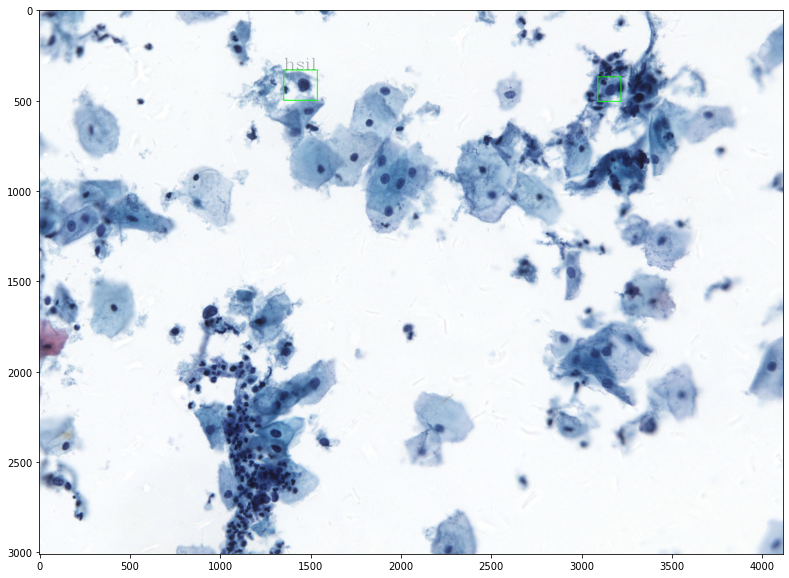

In [42]:


img_info = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]
annIds = coco.getAnnIds(imgIds=img_info['id'], catIds=catIds,iscrowd=None)
anns = coco.loadAnns(annIds)

imgPath = os.path.join('../data/coco/',img_info['file_name'])
img = cv2.imread(imgPath)

bbox_color = mmcv.visualization.color_val('green')
text_color = mmcv.visualization.color_val('black')


classes = ('normal', 'ascus', 'asch', 'lsil', 'hsil',
           'agc', 'vaginalis', 'monilia',
           'dysbacteriosis_herpes_act', 'ec')
bboxes = []
labels = []
for a in anns:
    bboxes.append(a['bbox'])
    labels.append(a['category_id'])
    
for bbox, label in zip(bboxes, labels):
    bbox_int = np.array(bbox).astype(np.int32)
    left_top = (bbox_int[0], bbox_int[1])
    right_bottom = (bbox_int[0]+bbox_int[2], bbox_int[1]+bbox_int[3])
    cv2.rectangle(
        img, left_top, right_bottom, bbox_color, thickness=3)
    label_text = classes[
        label] if classes is not None else f'cls {label}'
    if len(bbox) > 4:
        label_text += f'|{bbox[-1]:.02f}'
    cv2.putText(img, label_text, (bbox_int[0], bbox_int[1] - 2),
                cv2.FONT_HERSHEY_COMPLEX, 3, text_color)


fig_size=(15, 10)
plt.figure(figsize=fig_size)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()


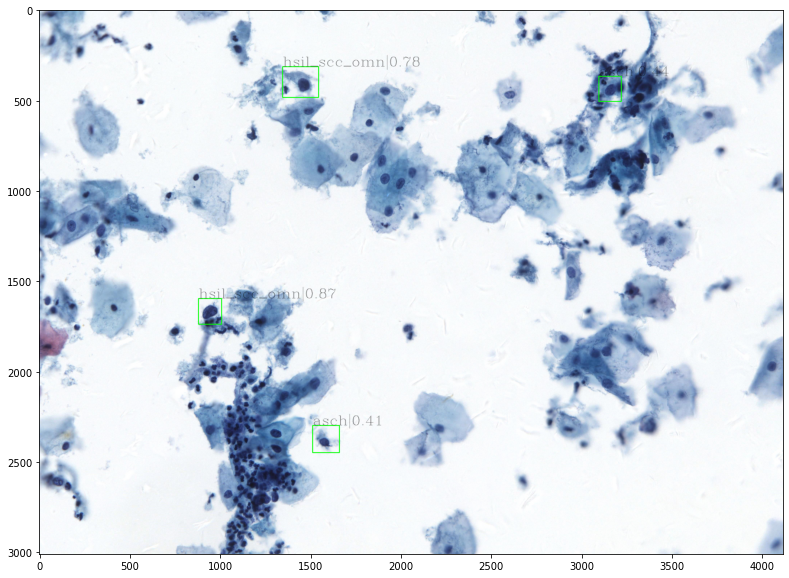

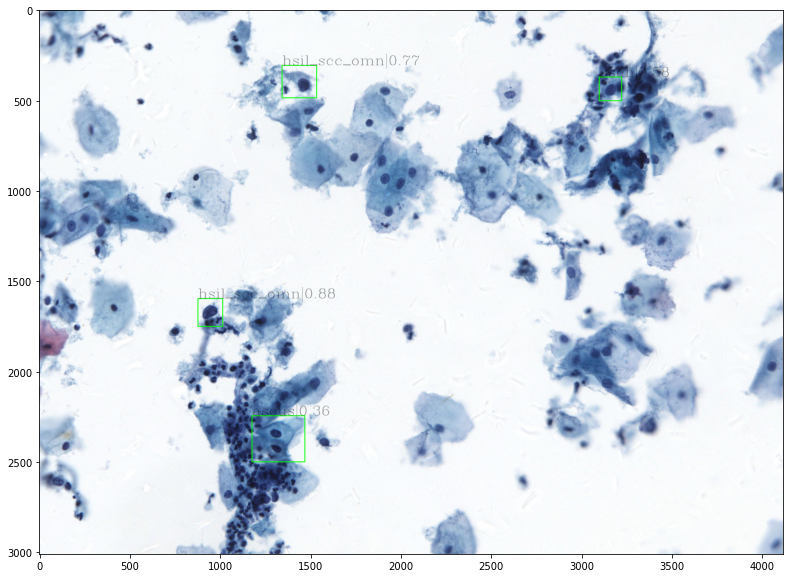

In [43]:
img_det = imgPath
save_p2p = './image/' + img_det[-16:-4] + '_p2p.jpg'
save_faster = './image/' + img_det[-16:-4] + '_faster.jpg'

p2p_result = inference_detector(p2p_model, img_det)
faster_result = inference_detector(faster_model, img_det)

show_result_pyplot(p2p_model, img_det, p2p_result, path = None)
show_result_pyplot(faster_model, img_det, faster_result, path = None)

In [44]:
save_gt = img_info['file_name']
save_gt = './image/' + save_gt[-16:-4] + '_gt.jpg'
print(save_gt)
cv2.imwrite( save_gt, img)

./image/tct_val05494_gt.jpg


True

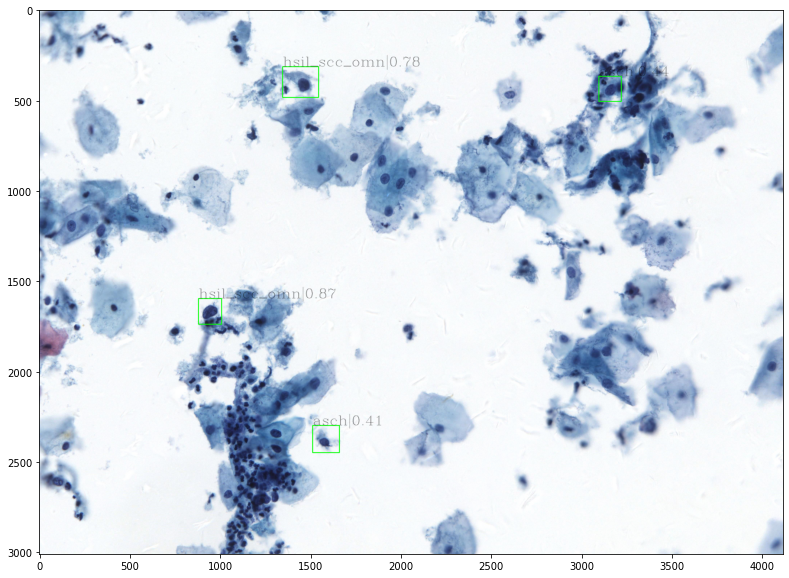

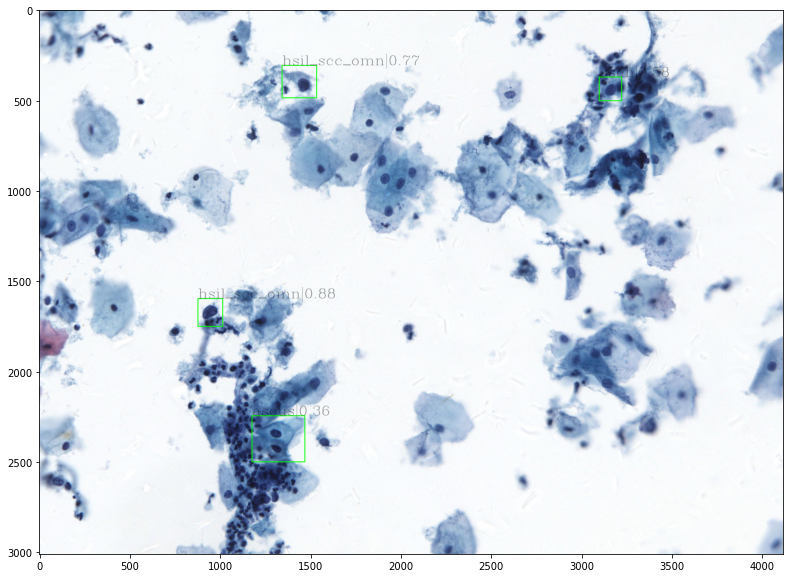

In [45]:
show_result_pyplot(p2p_model, img_det, p2p_result, path = save_p2p)
show_result_pyplot(faster_model, img_det, faster_result, path = save_faster)

In [7]:
img_list = [
    '../data/coco/TCT_JPEGImages/train30000/tct_val11378.jpg',
    '../data/coco/TCT_JPEGImages/train30000/tct_val26876.jpg',
    '../data/coco/TCT_JPEGImages/train30000/tct_val13077.jpg',

    '../data/coco/TCT_JPEGImages/train30000/tct_val11763.jpg',   # !!!
    '../data/coco/TCT_JPEGImages/train30000/tct_val11748.jpg',
    '../data/coco/TCT_JPEGImages/train30000/tct_val26100.jpg',
    '../data/coco/TCT_JPEGImages/train30000/tct_val29820.jpg',
    '../data/coco/TCT_JPEGImages/train30000/tct_val07606.jpg',
    '../data/coco/TCT_JPEGImages/train30000/tct_val11655.jpg',
    '../data/coco/TCT_JPEGImages/train30000/tct_val06169.jpg',    # !!!


    '../data/coco/TCT_JPEGImages/train30000/tct_val11361.jpg', # f > p
    '../data/coco/TCT_JPEGImages/train30000/tct_val00127.jpg']

In [ ]:
for img_det in img_list:
    save_p2p = './img/' + img_det[-16:-4] + '_p2p.jpg'
    save_faster = './img/' + img_det[-16:-4] + '_faster.jpg'

    p2p_result = inference_detector(p2p_model, img_det)
    faster_result = inference_detector(faster_model, img_det)
    
    show_result_pyplot(p2p_model, img_det, p2p_result, path = save_p2p)
    show_result_pyplot(faster_model, img_det, faster_result, path = save_faster)